In [4]:
from earnings_analyzer import batch_analyze
results = batch_analyze(["JNJ", "JPM", "WFC"], lookback_quarters=24, fetch_iv=True)


EARNINGS CONTAINMENT ANALYZER - v2.5 (HVol Backtest)
Lookback: 24 quarters (~6 years)
Current IV from Yahoo Finance (15-20min delayed)

✓ All 4 API keys available
                                                                                
📊 FETCH SUMMARY
✓ Earnings Cached (3): JNJ, JPM, WFC
✓ IV Retrieved (3): JNJ, JPM, WFC

BACKTEST RESULTS
Ticker  HVol% CurIV% IVPrem |  45D% 45Break  90D%  90Bias 90Break 90Drift  |                           Pattern
   JNJ     17     24   +36% |    62     4:5    78      52     2:3   +0.4%   |       IC90 + BIAS↓ (2:3↓ breaks)
   JPM     28     28    +0% |    58    8:2↑    61      70    6:3↑   +4.7%   | BIAS↑ (6:3↑ breaks, +4.7% drift)
   WFC     35     29   -16% |    71    6:1↑    65      65     5:3   +4.6%   |     IC45⚠↑ + BIAS↑ (5:3↑ breaks)

KEY TAKEAWAYS:

📊 Pattern Summary: 2 IC candidates | 2 Upward bias | 1 Downward bias | 0 No edge

💰 IV Landscape:
  Rich Premium (≥15%): JNJ(+36%)
  Thin Premium (≤-15%): WFC(-16%)
  Normal Range: 1 ticker


EARNINGS CONTAINMENT ANALYZER - v2.5 (HVol Backtest)
Lookback: 24 quarters (~6 years)
Current IV from Yahoo Finance (15-20min delayed)
Parallel processing: 4 workers

✓ All 4 API keys available
                                                                                
📊 FETCH SUMMARY
✓ Earnings Cached (38): DAL, PEP, FAST, BLK, C...
✓ IV Retrieved (38): DAL, PEP, FAST, BLK, C...

BACKTEST RESULTS
Ticker  HVol% CurIV% IVPrem |  45D% 45Break  90D%  90Bias 90Break 90Drift  |                                             Pattern
   DAL     43     42    -2% |    75    4:2↑    67      67     5:3   +3.5%   |                         IC45 + BIAS↑ (5:3↑ breaks)
   PEP     18     24   +32% |    71     4:3    74      65     3:3   +1.3%   |                                        IC90 + IC45
  FAST     24     31   +26% |    67    6:2↑    78      61     3:2   +4.0%   |            IC90 + BIAS↑ (3:2↑ breaks, +4.0% drift)
   BLK     28     28    -0% |    62    6:3↑    61      57     5:4   +4.9%   |

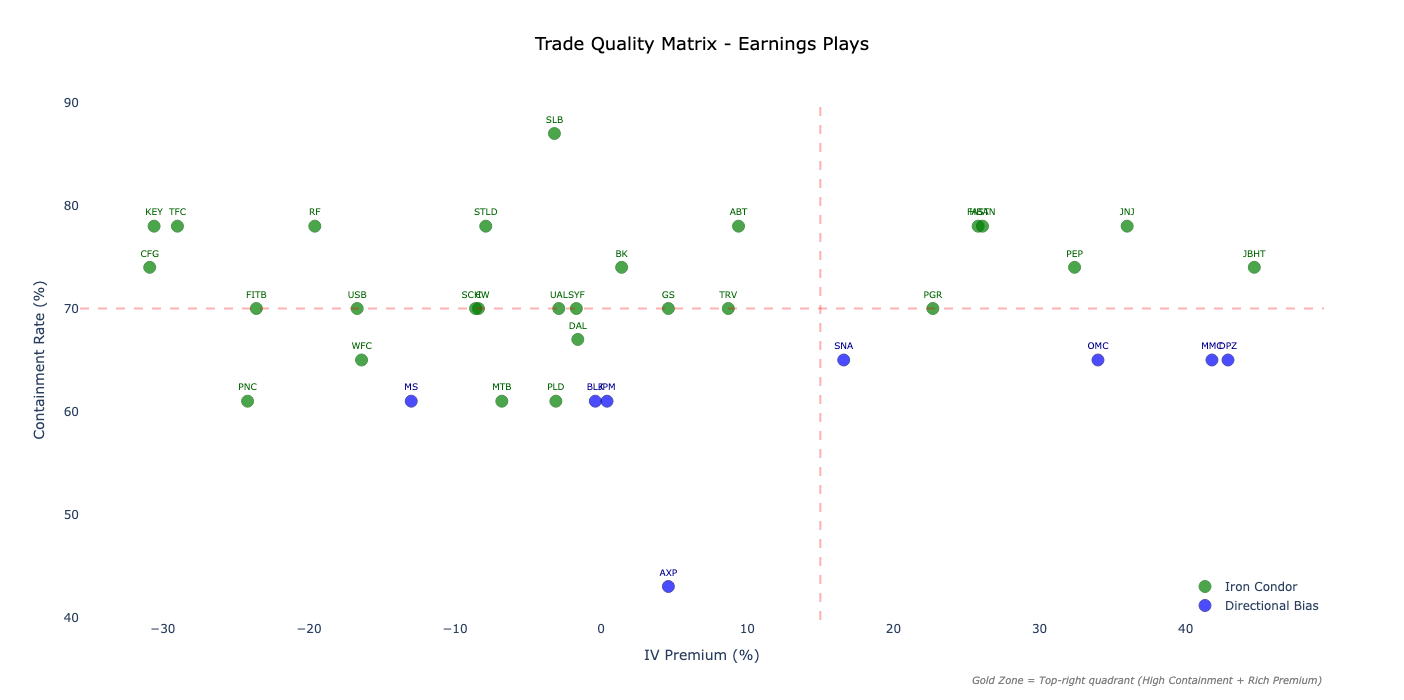

In [5]:
from earnings_analyzer import batch_analyze
from earnings_analyzer.visualization.quality_matrix import plot_quality_matrix

# Full ticker list
tickers = [
    "DAL", "PEP", "FAST", "BLK", "C", "DPZ", "GS", "JNJ", "JPM", "WFC",
    "OMC", "ABT", "BAC", "CFG", "MS", "PGR", "PLD", "PNC", "SYF", "JBHT",
    "UAL", "BK", "KEY", "MMC", "MTB", "SCHW", "SNA", "TRV", "USB", "CSX",
    "AXP", "FITB", "HBAN", "RF", "SLB", "STT", "TFC", "STLD"
]

results = batch_analyze(tickers, lookback_quarters=24, fetch_iv=True, parallel=True)

if results is not None:
    plot_quality_matrix(results, save_path='quality_matrix_full.html', show=True)

In [1]:
from earnings_analyzer import batch_analyze
results = batch_analyze(["AAPL", "MSFT"], lookback_quarters=24, fetch_iv=False)


EARNINGS CONTAINMENT ANALYZER - v2.5 (HVol Backtest)
Lookback: 24 quarters (~6 years)

✓ All 4 API keys available
                                                                                
📊 FETCH SUMMARY
✓ Earnings Cached (2): AAPL, MSFT

BACKTEST RESULTS
Ticker  HVol%  90D%  90Bias 90Break 90Drift  |                                    Pattern
  AAPL     27    78      57     3:2   +5.4%   |   IC90 + BIAS↑ (3:2↑ breaks, +5.4% drift)
  MSFT     24    78      65    5:0↑   +6.2%   | IC90⚠↑ + BIAS↑ (5:0↑ breaks, +6.2% drift)

KEY TAKEAWAYS:

📊 Pattern Summary: 2 IC candidates | 2 Upward bias | 0 Downward bias | 0 No edge

⚠️  Asymmetric ICs:
  Upside risk: MSFT

💡 Remember: Past patterns ≠ Future results. IV context shows current opportunity cost.
